In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway


In [2]:
#What is the change in prices of 3 bedroom houses over 20 years in the US?---------------
# If we look at the prices of houses compared over the range, can find trend/correlation
#null hypothesis, there is no correlation b/n the pricing of houses in the sample of data

In [3]:
#import the file with the data
real_data = Path('realtor-data.csv') 
real = pd.read_csv(real_data)

In [4]:
#create a dataframe
real_df = pd.DataFrame(real)
real_df.head()


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
#get rid of the values with nothing in them
real_df2 = real_df.dropna(how='any')
real_df2.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
3380,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5083,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5387,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
9053,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28


In [6]:
#remove the duplicate values
real_df3 = real_df2.drop_duplicates(keep='first', inplace=False, ignore_index=False)
real_df3.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
10344,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
10351,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [7]:
#filter by the years
real_df3['year'] = pd.DatetimeIndex(real_df3['sold_date']).year
real_df3.head()

/var/folders/qb/mn213hg14xb2nc3s79pt8f2h0000gn/T/ipykernel_8370/4230031176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df3['year'] = pd.DatetimeIndex(real_df3['sold_date']).year


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
10344,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
10351,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [8]:
# see the different types in columns
real_df3.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
year              int64
dtype: object

In [9]:
#filter the data so that it only shows the years 2000 and above
real_df4 = real_df3.loc[real_df3['year'] >= 2000
                     ,: ]
real_df4.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
10344,for_sale,950000.0,5.0,4.0,0.99,"46 Water Isle, Saint Thomas, VI, 00802",46 Water Isle,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
10351,for_sale,6899000.0,4.0,6.0,0.83,"10 Water Isle, Saint Thomas, VI, 00802",10 Water Isle,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012


In [10]:
# remove rows that do not have three bedrooms
real_df5 = real_df4[real_df4['bed'] == 3.0]
real_df5.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
24237,for_sale,525000.0,3.0,3.0,0.45,"955 River Rd, Agawam, MA, 01001",955 River Rd,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
24238,for_sale,289900.0,3.0,2.0,0.36,"82 Harvey Johnson Dr, Agawam, MA, 01001",82 Harvey Johnson Dr,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012
24251,for_sale,199999.0,3.0,2.0,1.76,"88 South St, Agawam, MA, 01001",88 South St,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,2008
24268,for_sale,275000.0,3.0,2.0,0.16,"5 Bedford Ct Unit 5, Amherst, MA, 01002",5 Bedford Ct Unit 5,Amherst,Massachusetts,1002.0,1280.0,2021-08-19,2021
24283,for_sale,975000.0,3.0,4.0,3.04,"1581 S East St, Amherst, MA, 01002",1581 S East St,Amherst,Massachusetts,1002.0,2074.0,2006-06-21,2006


In [11]:
#format the pricing to graph better
real_df5['price'].round(decimals = 6)

24237     525000.0
24238     289900.0
24251     199999.0
24268     275000.0
24283     975000.0
            ...   
613029    250000.0
613033    434900.0
613037    275000.0
613038    214900.0
613049    210000.0
Name: price, Length: 6179, dtype: float64

In [12]:
#--------------- Creating the Visualizations ------------------------------------------

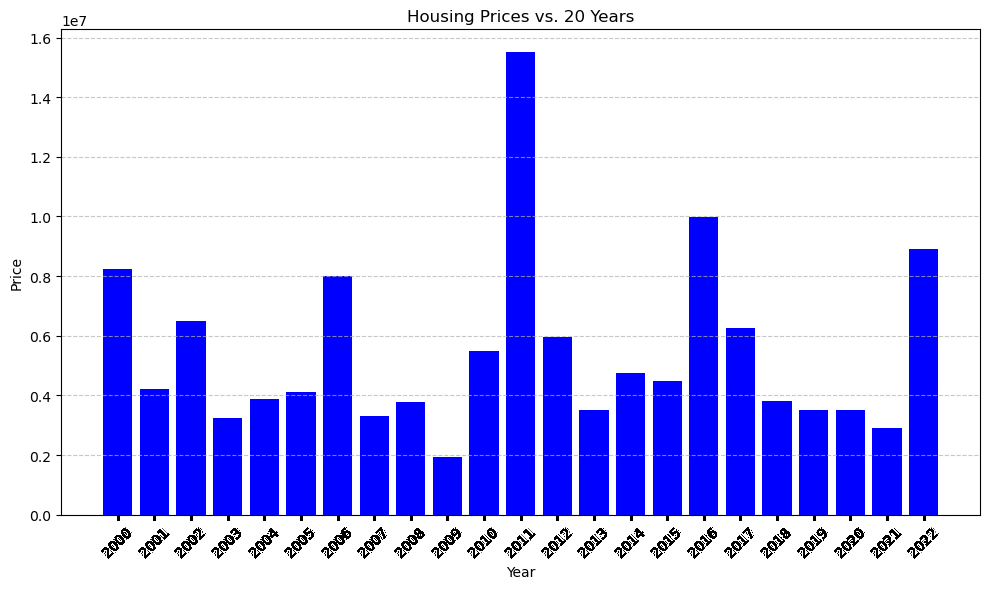

In [13]:
#create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(real_df5['year'], real_df5['price'], color='b')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Housing Prices vs. 20 Years')

#adjusting the formatting
plt.grid(axis= 'y', linestyle='--', alpha=0.7)
plt.xticks(real_df5['year'], rotation=45)
plt.tight_layout()

#saving the image
plt.savefig("Housing Prices vs. 20 Yearsbar.png")


plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

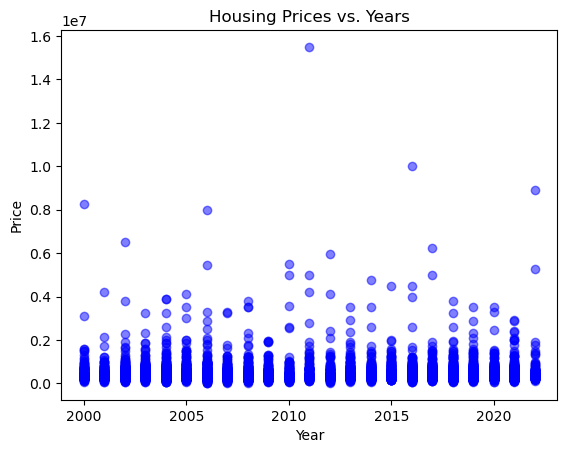

In [14]:
#create a scatter plot 
plt.scatter(real_df5['year'], real_df5['price'], color='blue', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Housing Prices vs. Years')

#saving the image
plt.savefig("Housing Prices vs. 20 Yearsscatter.png")




plt.show


In [15]:
#------------- Conducting the Statistical and Numerical Tests --------------------------

In [16]:
#use ANOVA test for analysis 
grouped_data = real_df5.groupby('year')['price']
groups = [grouped_data.get_group(year) for year in real_df5['year'].unique()]

In [17]:
result = f_oneway(*groups)
print("ANOVA Results:")
print("The statistic is:", result.statistic)
print("The p-value is:", result.pvalue)

ANOVA Results:
The statistic is: 1.8373483449894197
The p-value is: 0.009824140867181403


In [18]:
#get the average of prices
avg_prices = real_df5['price'].mean()
print(avg_prices)

498810.27917138697
